In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Definitions
E = 0  # empty
W = 1  # wall
T = 2  # thief
G = 3  # guardian
S = 4  # treasure

cell_types = [E, W, T, G, S]  # must increment from zero
type_colors = {
    E: 'lightgrey', 
    W: 'dimgrey', 
    T: 'tab:purple', 
    G: 'tab:cyan', 
    S: 'tab:orange',
}

type_names = {
    E: 'Empty',
    W: 'Wall',
    T: 'Thief',
    G: 'Guardian',
    S: 'Treasure',
}

In [3]:
# Configuration
step = 24

w = 5  # width
h = 5  # height

map = np.array([
    [T, E, E, E, E], 
    [W, E, E, E, E], 
    [W, E, E, W, G], 
    [W, E, E, W, W], 
    [G, E, E, E, S],
])

id2team = [T, G, G]
pos2id  = {
    (0, 0): 0, 
    (2, 4): 1, 
    (4, 0): 2,
}

In [4]:
# Each cells shows the id of the avatar that is there
display_map = np.full(map.shape, fill_value='')
for pos, id in pos2id.items():
    display_map[pos] = id  # FIXME this only displays the first character

In [5]:
# Setup colors
cmap = matplotlib.colors.ListedColormap([type_colors[t] for t in cell_types])
bounds = np.array(cell_types) - .5  # for n colors there are n+1 bounds
norm = matplotlib.colors.BoundaryNorm([*bounds, max(cell_types) + .5], len(cell_types))

In [6]:
# Setup sizes
plt.rcParams.update({'font.size': 25})  # due to a bug this needs to be ran twice

In [7]:
# Show legend entries for each cell type
legend_elements = [
    Patch(facecolor=color, label=type_names[t])
    for t, color in type_colors.items()
]

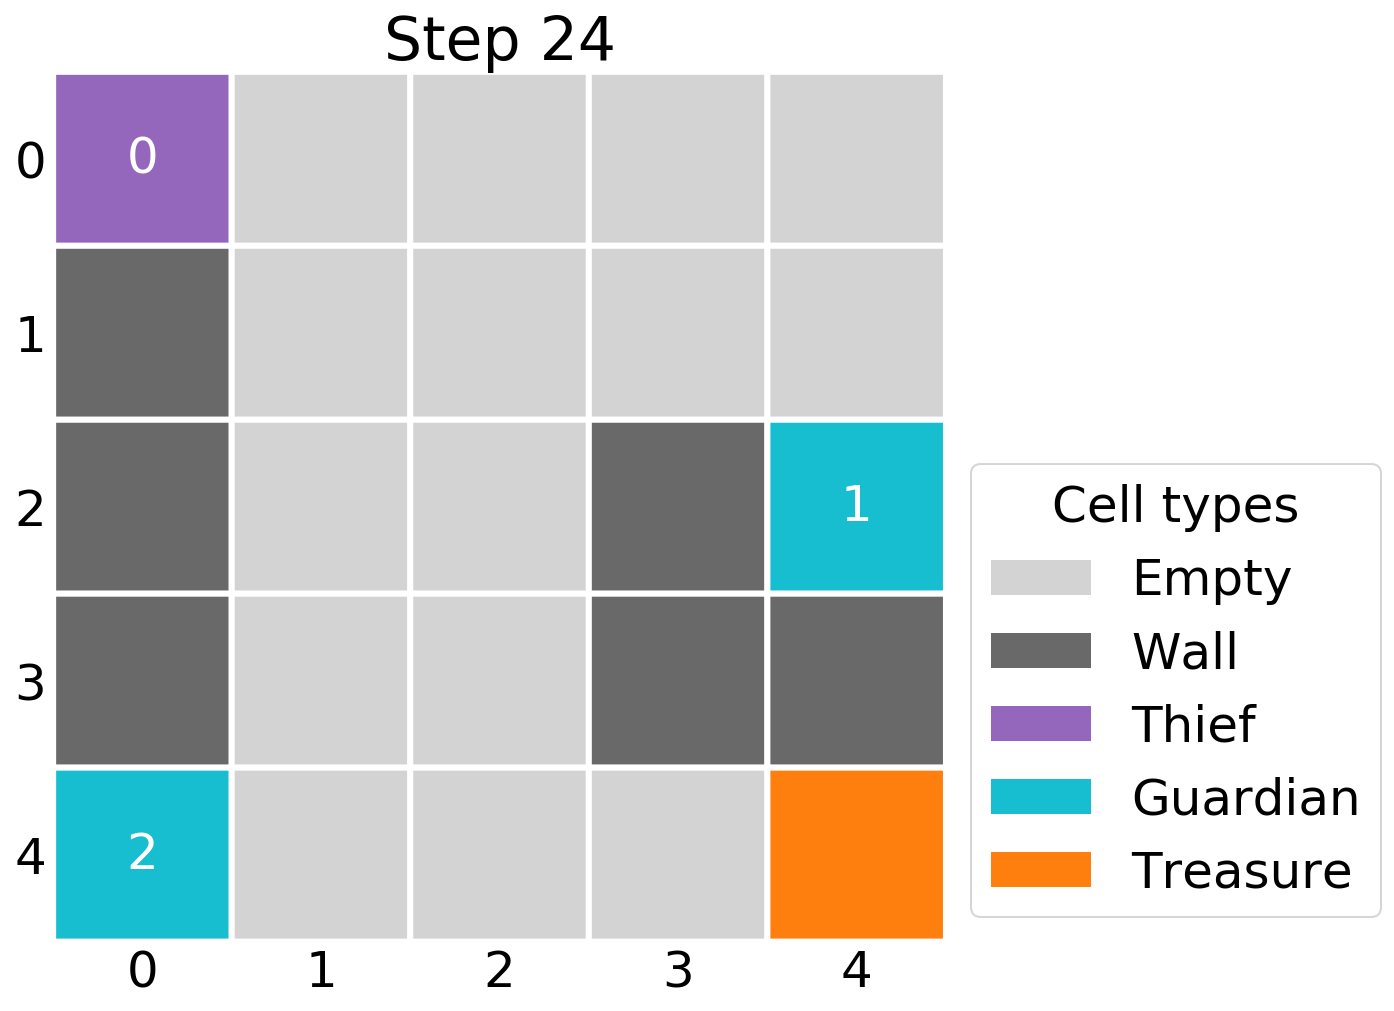

In [8]:
# Setup plot
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax.set_title(f'Step {step}')

# Color each cell
c = ax.pcolor(
    map, 
    edgecolors='white', 
    linewidths=3, 
    cmap=cmap,
    norm=norm,
    vmin=min(cell_types), 
    vmax=max(cell_types),
)

# Draw text inside each cell    
c.update_scalarmappable()
for p, bg, text in zip(c.get_paths(), c.get_facecolors(), display_map.flatten()):
    # Black for ligther background and white for darker ones
    if np.all(bg[:3] > .5):
        text_color = 'black'
    else:
        text_color = 'white'
    
    x, y = p.vertices[:-2, :].mean(axis=0)
    ax.text(x, y, text, ha='center', va='center', color=text_color)

# Place the ticks at the middle of each cell
ax.set_yticks(np.arange(w) + .5, minor=False)
ax.set_xticks(np.arange(h) + .5, minor=False)

# Set tick labels to cell row/column
ax.set_xticklabels(range(w), minor=False)
ax.set_yticklabels(range(h), minor=False)

# Hide all the ticks (but not tick labels)
ax.tick_params(axis='both', which='both',length=0)

# Turn everything upside down because in a coordinate system (0, 0) is bottom left
ax.invert_yaxis()

# Remove all spines
for loc in ['top', 'bottom', 'left', 'right']:
    ax.spines[loc].set_visible(False)

# Show the legend
ax.legend(
    handles=legend_elements, 
    title='Cell types',
    
    # Place legend box outside the plot
    loc='lower left', # anchor position
    bbox_to_anchor=(1, 0),
);